<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/LSTM_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Stock Price with Keras LSTM model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv', parse_dates=['Date'])
training_set = dataset_train.iloc[:, 1:2].values

# test csv

test_URL = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

In [5]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
62/62 [==============================] - 16s 137ms/step - loss: 0.0123
Epoch 2/40
62/62 [==============================] - 8s 134ms/step - loss: 0.0032
Epoch 3/40
62/62 [==============================] - 9s 139ms/step - loss: 0.0028
Epoch 4/40
62/62 [==============================] - 9s 138ms/step - loss: 0.0030
Epoch 5/40
62/62 [==============================] - 9s 140ms/step - loss: 0.0025
Epoch 6/40
62/62 [==============================] - 8s 137ms/step - loss: 0.0022
Epoch 7/40
62/62 [==============================] - 9s 139ms/step - loss: 0.0022
Epoch 8/40
62/62 [==============================] - 8s 133ms/step - loss: 0.0022
Epoch 9/40
62/62 [==============================] - 8s 136ms/step - loss: 0.0021
Epoch 10/40
62/62 [==============================] - 9s 153ms/step - loss: 0.0019
Epoch 11/40
62/62 [==============================] - 8s 136ms/step - loss: 0.0018
Epoch 12/40
62/62 [==============================] - 8s 131ms/step - loss: 0.0017
Epoch 13/40
62/62 [=====

### Predict Future Stock using Test Set

In [15]:
dataset_test = pd.read_csv(test_URL, parse_dates=['Date'])
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

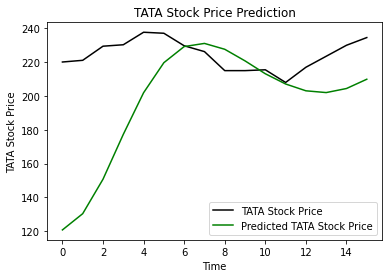

In [17]:
# plot results

plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()